In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
import collections
from collections import Counter

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.21.6
Pandas version: 1.3.5
Seaborn version: 0.11.2


In [2]:
rcParams['figure.figsize'] = (10, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
import warnings
warnings.filterwarnings('ignore') ##hati hati menggunakan ini karena peringatan tidak bisa terdeteksi

In [4]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign (4).csv


In [5]:
df = pd.read_csv("marketing_campaign.csv",sep=";")

# Handling Missing Value

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat 24 missing value pada kolom 'Income.

In [7]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

Data yang hilang adalah sebanyak 1.07%. Maka dari itu, dikarenakan data yang hilang kurang dari 5% data total, baris dengan data yang hilang akan dihapuskan.

In [8]:
df.dropna(inplace=True, subset=['Income'])

In [9]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Handling Duplicated Data

In [10]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset ini.

# Feature Extraction

In [11]:
df['Age'] = 2023 - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']

In [12]:
columns = ['Education', 'Marital_Status', 'Income', 'Age', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome']
df = df[columns]

In [13]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1348,Graduation,Together,62061.0,47,1,2013-08-31,12,641,7,84,...,0,0,0,7793,3,11,0,1976,0,1


# Label Encoding

Label Encoding akan dilakukan pada kolom 'Education' yang memiliki tipe data ordinal.

In [14]:
x = np.array(df['Education'])
print(np.unique(x))

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']


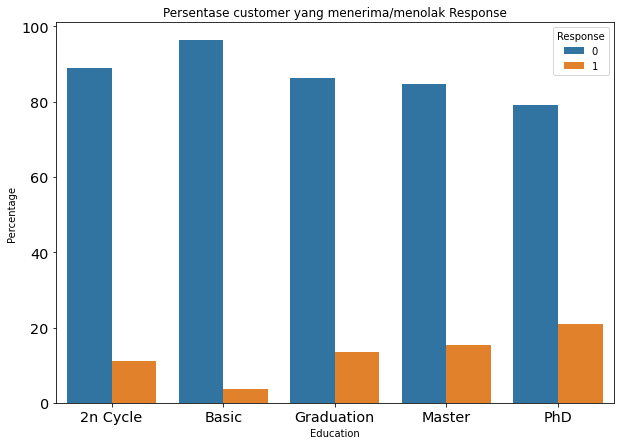

In [15]:
df_temp = df.groupby(['Education', 'Response'])['ID'].count().reset_index()
df_temp_2 = df.groupby(['Education'])['ID'].count().reset_index()
df_merge = df_temp.merge(df_temp_2, on='Education', how='inner')
df_merge.columns = ['Education', 'Response', 'CountCust', 'TotalCust']
df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
sns.barplot(x = 'Education', y = 'Percentage', data = df_merge, hue = 'Response')
plt.title('Persentase customer yang menerima/menolak Response')
plt.show()

Kategori "2n Cycle" memiliki arti yang sama dengan "Master". Persentase customer yang menolak dan menerima respon untuk kategori '2n Cycle' dan 'Master' juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori "2n Cycle" akan dihapus dan digantikan dengan kaegori "Master".

In [16]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')
x = np.array(df['Education'])
print(np.unique(x))

['Basic' 'Graduation' 'Master' 'PhD']


In [17]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1502,Graduation,Married,42014.0,46,1,2012-08-17,56,244,15,108,...,0,0,1,3340,3,11,0,1977,1,0


Dilakukan perubahan feature categorical menjadi numeric sebagai berikut:

- 'Basic' --> 0
- 'Graduation' --> 1
- 'Master' --> 2
- 'PhD' --> 3

In [18]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3    
}
df['Education'] = df['Education'].map(mapping_education)

In [19]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1403,1,Single,36864.0,66,1,2012-08-13,53,204,5,39,...,0,0,1,4188,3,11,0,1957,0,1


# One Hot Encoding (OHE)

One Hot Encoding akan dilakukan pada kolom 'Marital_Status' yang memiliki lebih dari 2 kategori dan tidak bertipe data ordinal.

In [20]:
x = np.array(df['Marital_Status'])
print(np.unique(x))

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


In [21]:
df.head(5)

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
0,1,Single,58138.0,66,0,2012-09-04,58,635,88,546,...,0,0,1,5524,3,11,0,1957,0,0
1,1,Single,46344.0,69,2,2014-03-08,38,11,1,6,...,0,0,0,2174,3,11,0,1954,1,1
2,1,Together,71613.0,58,0,2013-08-21,26,426,49,127,...,0,0,0,4141,3,11,0,1965,0,0
3,1,Together,26646.0,39,1,2014-02-10,26,11,4,20,...,0,0,0,6182,3,11,0,1984,1,0
4,3,Married,58293.0,42,1,2014-01-19,94,173,43,118,...,0,0,0,5324,3,11,0,1981,1,0


Sebelum dilakukan OHE, banyak kategori dalam kolom 'Marital_Status' yang ambigu dan memiliki arti yang sama. Maka dari itu, dilakukan terlebih dahulu pergantian nama kategori.

In [22]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

x = np.array(df['Marital_Status'])
print(np.unique(x))

['Divorced' 'Married' 'Others' 'Single' 'Widow']


In [23]:
# Melakukan OHE
ohe = pd.get_dummies(df['Marital_Status'], prefix = 'Status')
df = df.join(ohe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Age                  2216 non-null   int64  
 4   Dependents           2216 non-null   int64  
 5   Dt_Customer          2216 non-null   object 
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [24]:
# Menghapus kolom Marital Status
df = df.drop(columns=['Marital_Status']).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Age                  2216 non-null   int64  
 3   Dependents           2216 non-null   int64  
 4   Dt_Customer          2216 non-null   object 
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [25]:
df.columns

Index(['Education', 'Income', 'Age', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'ID', 'Z_CostContact',
       'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome',
       'Status_Divorced', 'Status_Married', 'Status_Others', 'Status_Single',
       'Status_Widow'],
      dtype='object')

In [26]:
columns2 = ['Age', 'Education', 'Status_Divorced', 'Status_Married', 
               'Status_Others', 'Status_Single', 'Status_Widow', 'Income','Dependents', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
            'ID', 'Year_Birth', 'Kidhome', 'Teenhome']
df = df[columns2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Status_Divorced      2216 non-null   uint8  
 3   Status_Married       2216 non-null   uint8  
 4   Status_Others        2216 non-null   uint8  
 5   Status_Single        2216 non-null   uint8  
 6   Status_Widow         2216 non-null   uint8  
 7   Income               2216 non-null   float64
 8   Dependents           2216 non-null   int64  
 9   Dt_Customer          2216 non-null   object 
 10  Recency              2216 non-null   int64  
 11  MntWines             2216 non-null   int64  
 12  MntFruits            2216 non-null   int64  
 13  MntMeatProducts      2216 non-null   int64  
 14  MntFishProducts      2216 non-null   int64  
 15  MntSweetProducts     2216 non-null   i

# Feature Selection

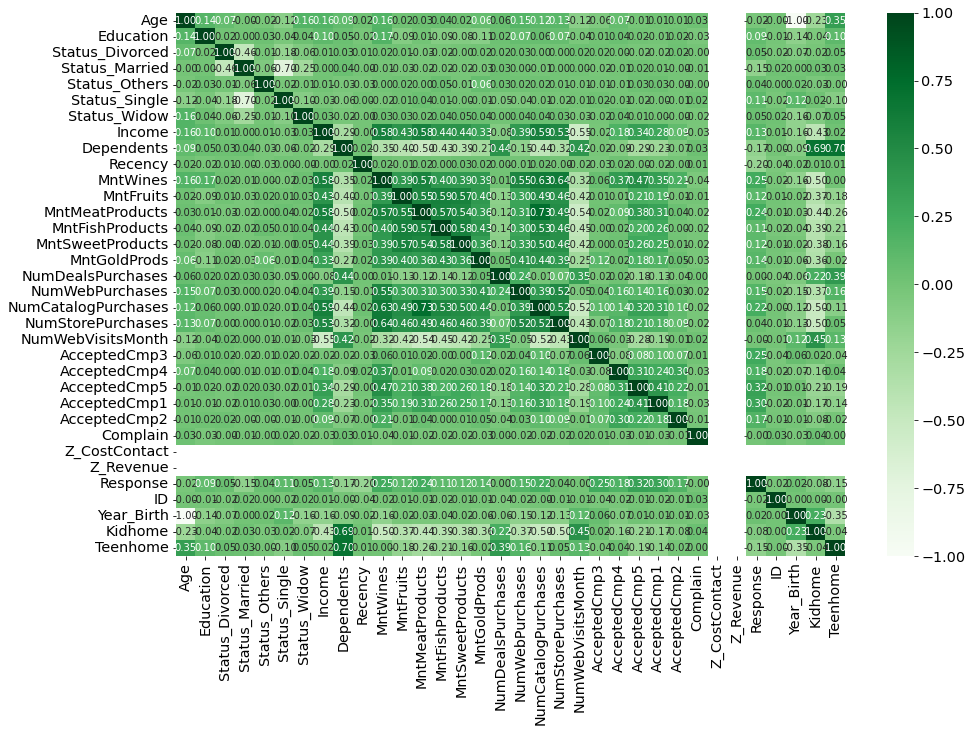

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

In [28]:
# membuang feature yang kurang relevan

drop_feature = ['ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer']
df = df.drop(columns=drop_feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Status_Divorced      2216 non-null   uint8  
 3   Status_Married       2216 non-null   uint8  
 4   Status_Others        2216 non-null   uint8  
 5   Status_Single        2216 non-null   uint8  
 6   Status_Widow         2216 non-null   uint8  
 7   Income               2216 non-null   float64
 8   Dependents           2216 non-null   int64  
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

Alasan drop feature:

- ID: ID bersifat unik di setiap row dengan korelasi sebesar -0.02 dengan Response sehingga tidak akan mempengaruhi target
- Z_CostContract: bernilai 3 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- Z_Revenue: bernilai 11 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- Complain: memiliki nilai korelasi senilai -0.00 dengan Response dan hanya sedikikt dari customer yang pernah melakukan complain, sehingga tidak signifikan terhadap target
- Year_Birth: dihapus dan dibuat feature baru 'Age' karena lebih menggambarkan umur customer
- Kidhome dan Teenhome: dihapus dan dibuat feature baru 'Dependents' untuk lebih menggambarkan berapa jumlah anggota keluarga yg dependent
- Dt_Customer: dihapus karena tanggal customer mulai bergabung tidak mempengaruhi model prediksi

# Handling Outliers

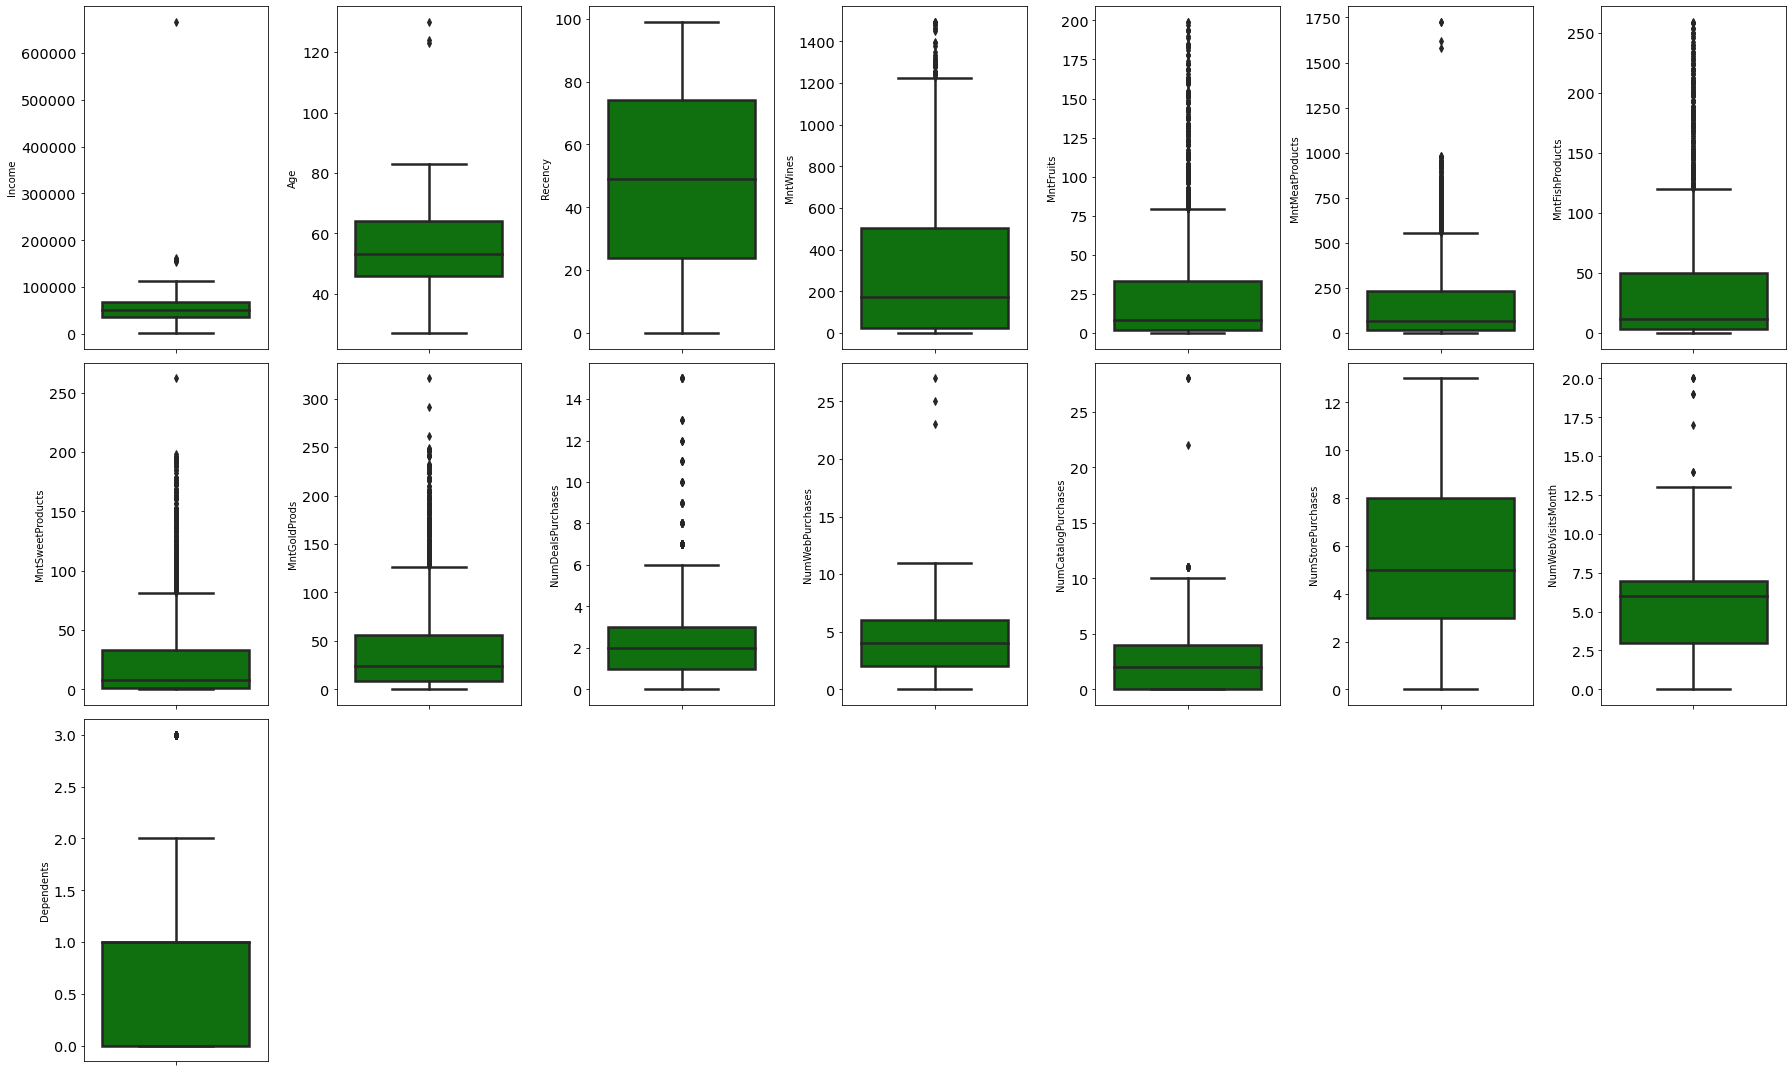

In [29]:
nums=['Income','Age','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Dependents']

plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Diketahui kolom yang memiliki data outliers adalah:

- Income
- Age
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumWebVisitsMonth
- Dependents

Dikarenakan banyak kolom yang memiliki data outliers, diputuskan untuk menghapus data outlier ini berdasarkan Z-score.

In [30]:
# Hapus Outlier dengan Z-Score

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
kolom_outlier = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',  'NumWebVisitsMonth', 'Dependents']
for col in kolom_outlier:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 1953


In [31]:
((2216-1955)/2216) * 100

11.77797833935018

Jumlah data yang dihapus berdasarkan outlier adalah 11.77%.

# Split Data

Memisahkan data train dan test.

In [32]:
x = df[['Age', 'Education', 'Status_Divorced', 'Status_Married',
       'Status_Others', 'Status_Single', 'Status_Widow', 'Income',
       'Dependents', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
y = df[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("x_train dataset: ", x_train.shape)  
print("y_train dataset: ", y_train.shape)  
print("x_test dataset: ", x_test.shape)  
print("y_test dataset: ", y_test.shape) 

x_train dataset:  (1367, 26)
y_train dataset:  (1367, 1)
x_test dataset:  (586, 26)
y_test dataset:  (586, 1)


Data train sebanyak 1367 baris dan data test sebanyak 586 baris.

# Feature Transformation


## Nilai Asli

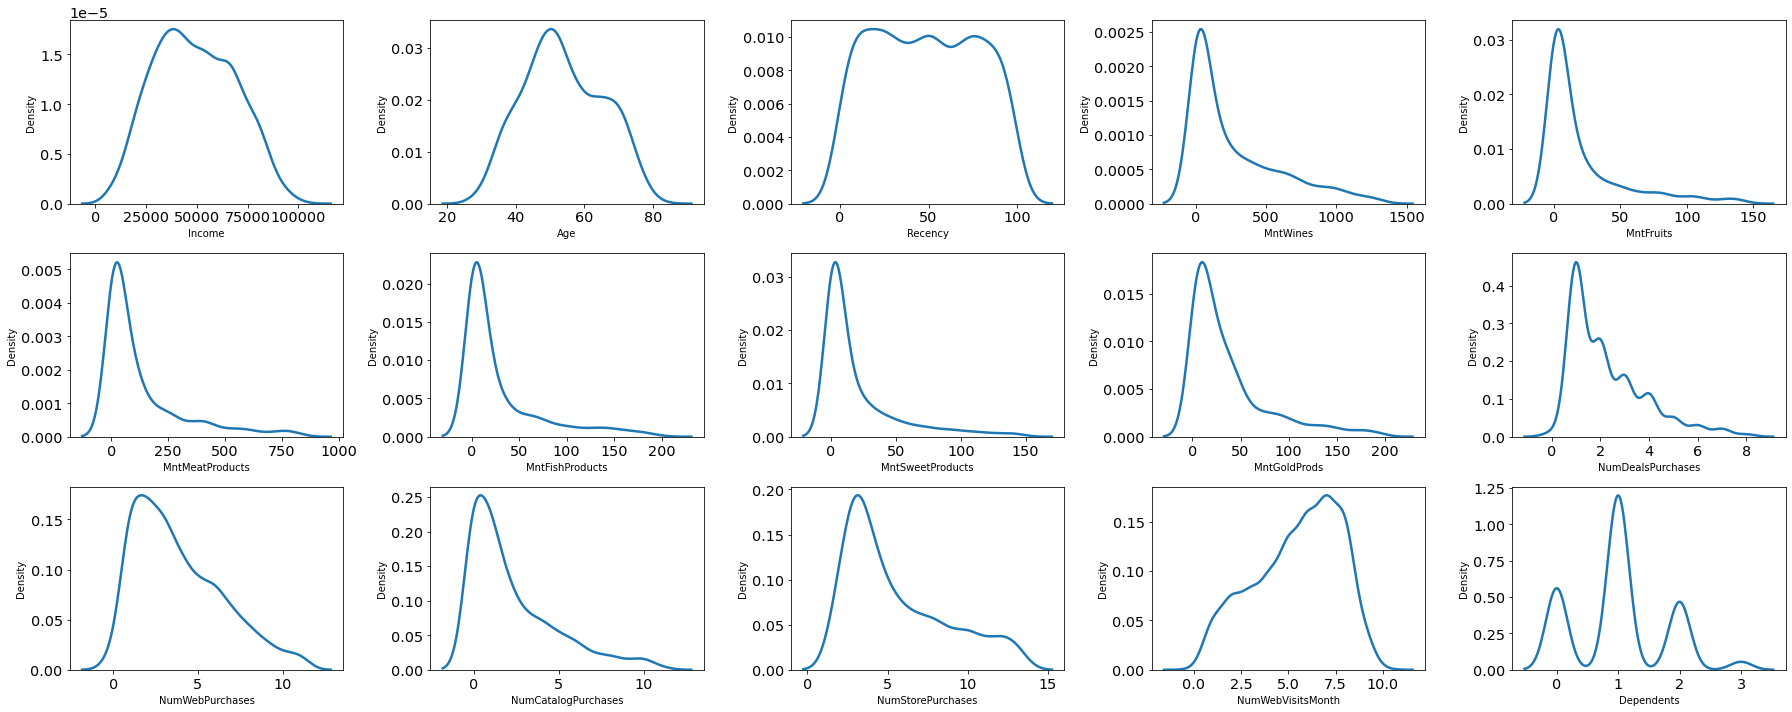

In [33]:
data1 = ['Income','Age','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Dependents']
plt.figure(figsize=(25, 10))

# x_train
for i in range(0, len(data1)):
  plt.subplot(3, 5, i+1)
  sns.kdeplot(x_train[data1[i]])
  plt.tight_layout()

In [34]:
for i in range(0, len(data1)):
  skew = x_train[data1[i]].skew(axis = 0, skipna = True)
  print(f'{data1[i]}: {skew}')

Income: 0.14660831929904175
Age: 0.12487911908262027
Recency: 0.03437330430439842
MntWines: 1.2779558987299544
MntFruits: 2.019363790906303
MntMeatProducts: 1.943681603908616
MntFishProducts: 1.9202911926181179
MntSweetProducts: 2.113173878963349
MntGoldProds: 1.738368252347451
NumDealsPurchases: 1.2897833753224144
NumWebPurchases: 0.781144933475962
NumCatalogPurchases: 1.3367200336692315
NumStorePurchases: 0.882669180303585
NumWebVisitsMonth: -0.4232931106830305
Dependents: 0.34668520305115114


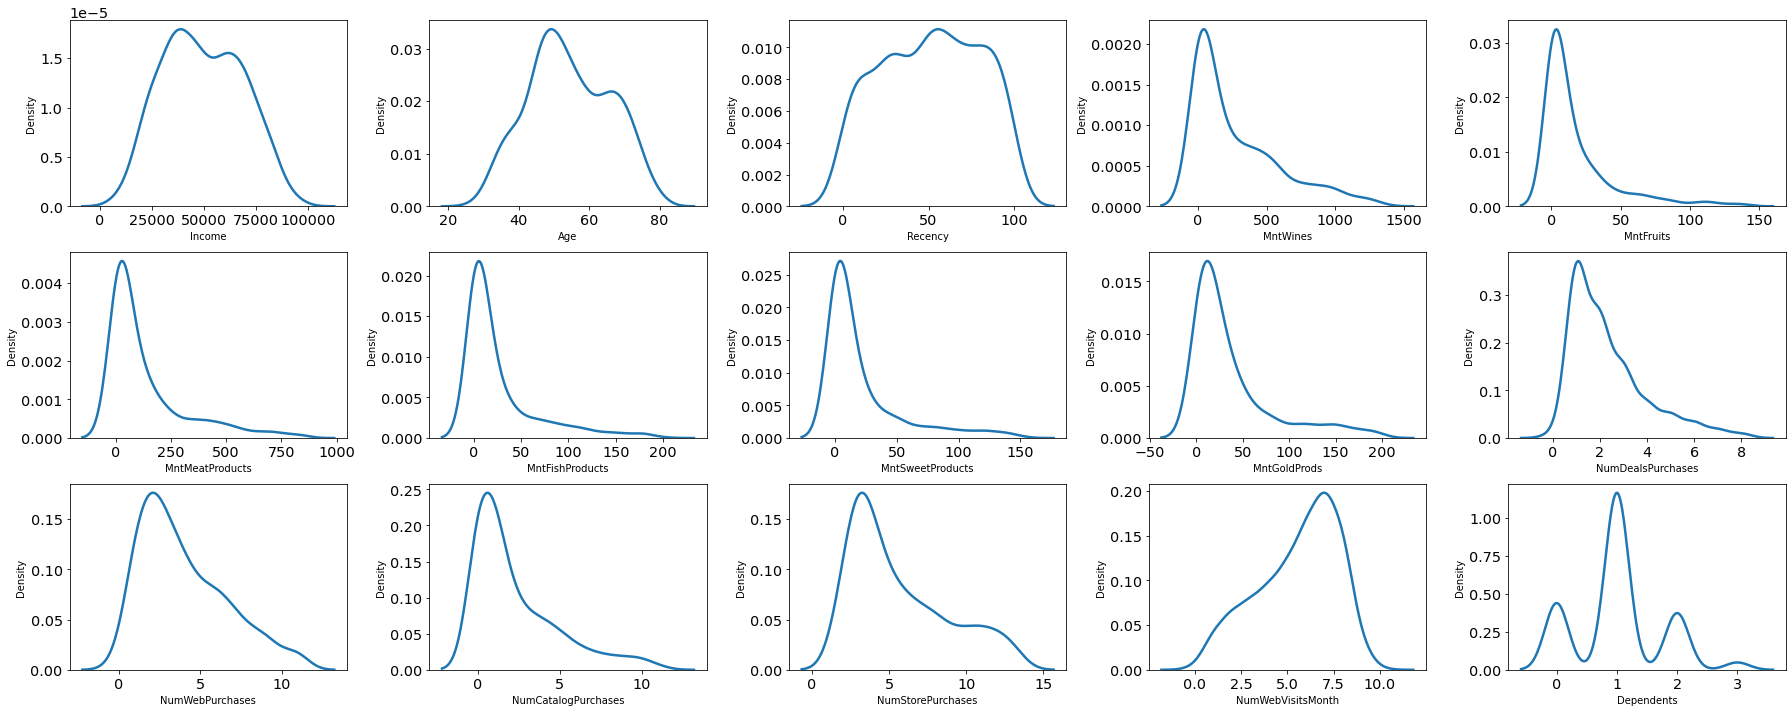

In [35]:
# x_test
plt.figure(figsize=(25, 10))

for i in range(0, len(data1)):
  plt.subplot(3, 5, i+1)
  sns.kdeplot(x_test[data1[i]])
  plt.tight_layout()

In [36]:
for i in range(0, len(data1)):
  skew = x_test[data1[i]].skew(axis = 0, skipna = True)
  print(f'{data1[i]}: {skew}')

Income: 0.1094105606923449
Age: 0.08675342098425623
Recency: -0.08575599221388625
MntWines: 1.2572061306037012
MntFruits: 2.310386142425573
MntMeatProducts: 1.8607058108791614
MntFishProducts: 2.076257378889607
MntSweetProducts: 2.0675208960700595
MntGoldProds: 1.7873490370578897
NumDealsPurchases: 1.3715778718716096
NumWebPurchases: 0.7989417508969392
NumCatalogPurchases: 1.3768862441043237
NumStorePurchases: 0.836559600374067
NumWebVisitsMonth: -0.5449460127722408
Dependents: 0.38942706488595086


Normalization:
- Income
- Age
- Dependents
- Recency

Standarization (left-skewed):
- NumWebVisitsMonth

Log Transformation:
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumStorePurchases

In [37]:
log = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases']

In [38]:
#Log Transformation x_train
for i in log:
  x_train[i] = np.log1p(x_train[i])

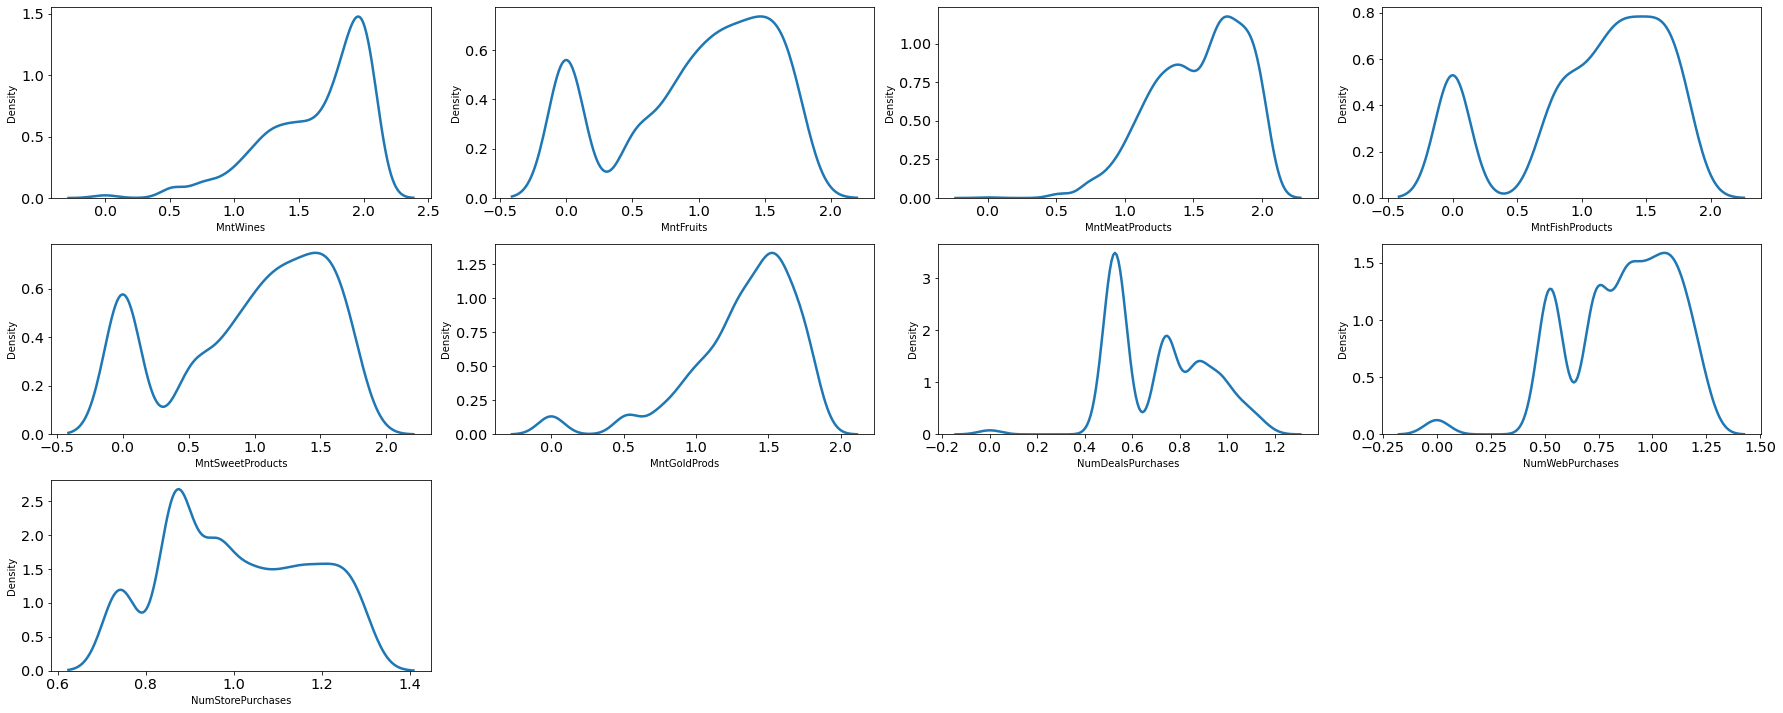

In [39]:

plt.figure(figsize=(25, 10))

for i in range(0, len(log)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(np.log1p(x_train[log[i]]))
  plt.tight_layout()

In [40]:
#Log Transformation x_test
for i in log:
  x_test[i] = np.log1p(x_test[i])

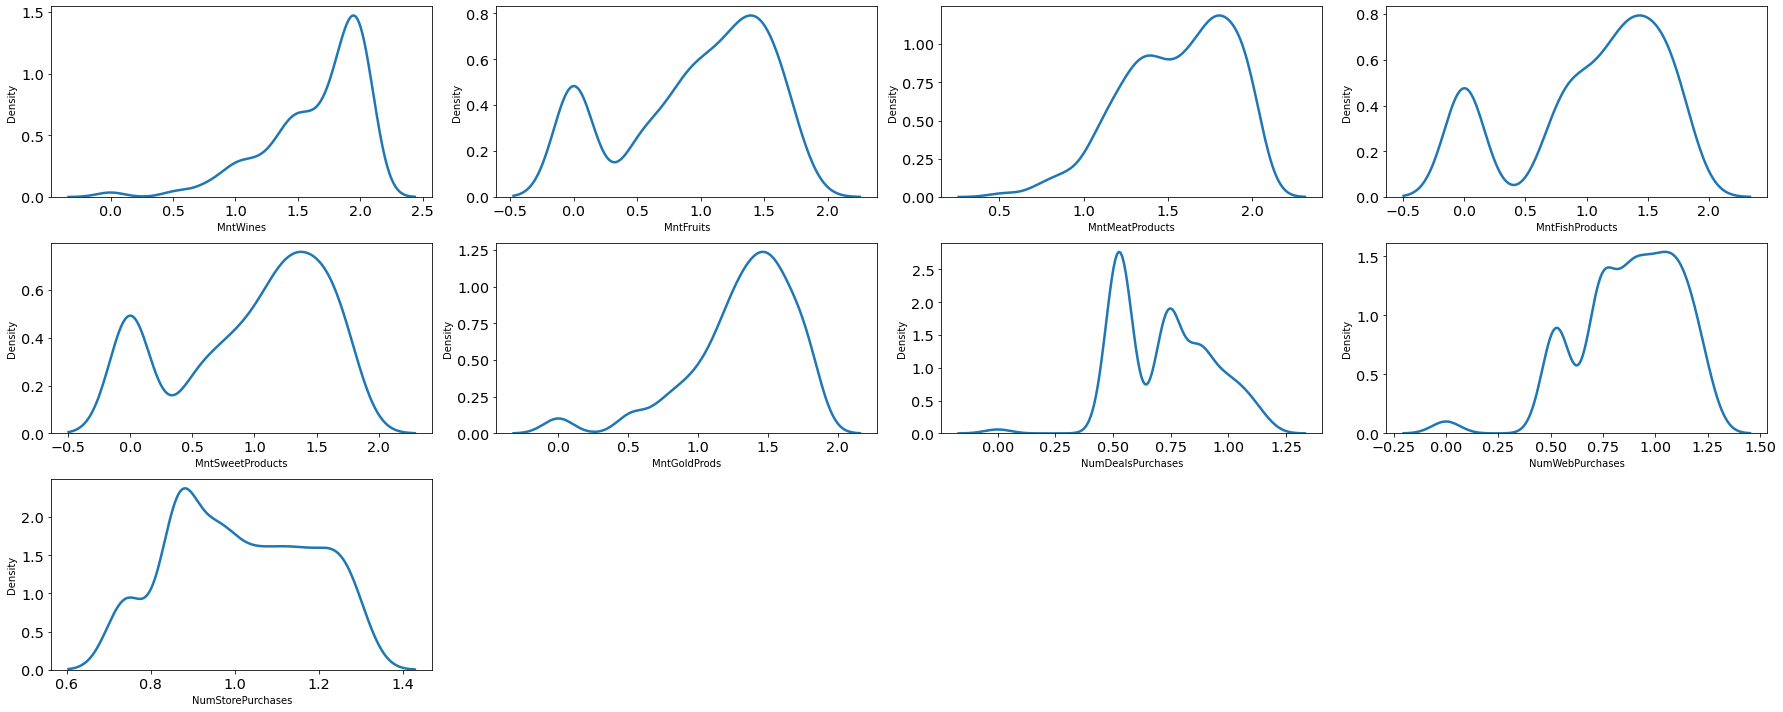

In [41]:
plt.figure(figsize=(25, 10))

for i in range(0, len(log)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(np.log1p(x_test[log[i]]))
  plt.tight_layout()

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
norm = ['Income', 'Age', 'Recency', 'Dependents']

mms = MinMaxScaler()

# Normalisasi x_train
for i in norm:
  x_train[i] = mms.fit_transform(x_train[i].values.reshape(len(x_train), 1))

In [43]:
# Normalisasi x_test
for i in norm:
  x_test[i] = mms.transform(x_test[i].values.reshape(len(x_test), 1))

In [44]:
sc = ['NumWebVisitsMonth']

ss = StandardScaler()

# Standarisasi x_train
for i in sc:
  x_train[i] = ss.fit_transform(x_train[i].values.reshape(len(x_train), 1))

In [45]:
# Standarisasi x_test
for i in sc:
  x_test[i] = ss.transform(x_test[i].values.reshape(len(x_test), 1))

In [46]:
x_train.sample()

,Age,Education,Status_Divorced,Status_Married,Status_Others,Status_Single,Status_Widow,Income,Dependents,Recency,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
978,0.785714,1,0,1,0,0,0,0.29855,0.666667,0.545455,...,1.386294,1.098612,0,1.609438,-0.667016,0,0,0,0,0


In [47]:
x_test.sample()

,Age,Education,Status_Divorced,Status_Married,Status_Others,Status_Single,Status_Widow,Income,Dependents,Recency,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
1241,18.666667,3,0,1,0,0,0,19687.333333,1.0,24.666667,...,1.098612,1.098612,0,1.386294,-0.667016,0,0,0,0,0


# Handling Class Imbalance

In [48]:
y_train['Response'].value_counts()

0    1181
1     186
Name: Response, dtype: int64

In [49]:
(261/len(df))*100

13.36405529953917

In [50]:
df.columns

Index(['Age', 'Education', 'Status_Divorced', 'Status_Married',
       'Status_Others', 'Status_Single', 'Status_Widow', 'Income',
       'Dependents', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response'],
      dtype='object')

Dataset masih tidak seimbang dikarenakan hanya 13.35% data yang mewakilkan customer merespon campaign. Maka dari itu, dilakukan oversampling dengan metode SMOTE.

In [51]:
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state = 42).fit_resample(x_train, y_train) 
  
print(sorted(Counter(y_over_SMOTE).items()),y_over_SMOTE.shape)

[('Response', 1)] (2362, 1)


In [52]:
y_over_SMOTE.value_counts()

Response
0           1181
1           1181
dtype: int64

# Feature Tambahan

In [53]:
feature_tambahan = ['Gender', 'TotalMntSpent', 'TotalAcceptedCmp', 'NumFamilyMembers']

Alasan feature tambahan:
- Gender: 1 untuk laki-laki, 0 untuk perempuann, perbedaan gender dapat menandakan perbedaan spending behavior. Untuk melihat apakah marketing campaign biasanya diterima oleh laki-laki atau perempuan.
- TotalMntSpent: jumlah dari MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, dan MntGoldProducts. Untuk melihat apakah marketing campaign biasanya diterima oleh customer dengan TotalMntSpent yang tinggi atau rendah.
- TotalAcceptedCmp: jumlah dari AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5. Untuk melihat apakah marketing campaign biasanya diterima oleh customer yang sudah sering menerima campaign sebelumnya atau tidak.
- NumFamilyMembers: jumlah anggota yang didapat dari kolom Marital_Status, KidHome, dan TeenHome. Untuk melihat apakah marketing campaign biasanya diterima oleh customer dengan jumlah anggota keluarga yang tinggi atau rendah.